In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score as r2
%matplotlib inline

In [2]:
data = pd.read_csv('./house_prices.csv')

In [3]:
# construct input and target values
data_arr = np.array(data); n = len(data_arr)
age = data_arr[:,1].reshape(n,1)
price = data_arr[:,4].reshape(n,1)

In [4]:
# normalization of feature and target
x = np.c_[np.ones((n,1)),(age-np.min(age))/(np.max(age)-np.min(age))]
y = price

In [5]:
# split training and test set
m=300

x_train=x[:m]
y_train=y[:m]

x_test =x[m:]
y_test =y[m:]

In [6]:
# Gradient descent
# assing initial parameters 
w_gd=np.array([-1,-0.5]).reshape(2,1); lr = 0.01;  max_iteration = 50
print ('initial value of parameters:', w_gd)

initial value of parameters: [[-1. ]
 [-0.5]]


In [7]:
#estimate parameters theta for the house price problem.
cos_func_val=np.zeros((max_iteration,1))

for i in range(max_iteration):
    for j in range(x_train.shape[0]):
        thetaxj = x_train[j].dot(w_gd)
        #gradient of cost function
        x = np.array([[0.0],[0.0]])
        x[0,0] = x_train[j,0]
        x[1,0] = x_train[j,1]
        grad = x*(thetaxj-y_train[j])
        #update weight vectors
        w_gd = w_gd - lr*grad
    
    #calculate cost function during iteration for plotting
    thetax = x_train.dot(w_gd)
    cos_func_val[i] = (1/m)*(thetax-y_train).T.dot(thetax-y_train)
    
print('weight vectors:',w_gd)

weight vectors: [[ 42.54078538]
 [-10.31939902]]


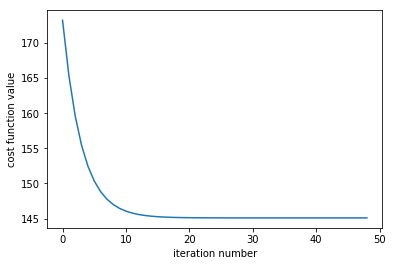

In [8]:
#Visualization
plt.plot(cos_func_val[0:i])
plt.xlabel('iteration number');plt.ylabel('cost function value')
plt.show()

In [9]:
#price prediction 
pred_train = x_train.dot(w_gd)
pred_test = x_test.dot(w_gd)

In [10]:
#------Evaluation --------------
def rmse(predictions, targets):
     return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val_train = rmse(pred_train, y_train)
print("rms error for the training set is: " + str(rmse_val_train))


rmse_val_test = rmse(pred_test, y_test)
print("rms error for the test set is: " + str(rmse_val_test))



rms error for the training set is: 12.04551030591235
rms error for the test set is: 16.58731450340051


Repeating for the other two features

In [11]:
# define batch_gradient_descent function based on Input and target values
def batch_gradient_descent(X,Y):
    # construct input and target values
    n = len(X)
    X_arr=np.array(X).reshape(n,1)
    y_arr=np.array(Y).reshape(n,1)
    # normalization of feature and target
    x = np.c_[np.ones((n,1)),(X_arr-np.min(X_arr))/(np.max(X_arr)-np.min(X_arr))]
    y = y_arr
    #split train test
    m=300
    x_train=x[:m]
    y_train=y[:m]
    x_test =x[m:]
    y_test =y[m:]
    # assing initial parameters 
    w_gd=np.array([-1,-0.5]).reshape(2,1); lr = 0.01; max_iteration = 50
    print ('initial value of parameters:', w_gd)
    cos_func_val=np.zeros((max_iteration,1))
    
    for i in range(max_iteration):
        for j in range(x_train.shape[0]):
            thetaxj = x_train[j].dot(w_gd)
            #gradient of cost function
            x = np.array([[0.0],[0.0]])
            x[0,0] = x_train[j,0]
            x[1,0] = x_train[j,1]
            grad = x*(thetaxj-y_train[j])
            #update weight vectors
            w_gd = w_gd - lr*grad
        #calculate cost function during iteration for plotting
        thetax = x_train.dot(w_gd)
        cos_func_val[i] = (1/m)*(thetax-y_train).T.dot(thetax-y_train)
    
    print('weight vectors:',w_gd)
    
    plt.plot(cos_func_val[0:i])
    plt.xlabel('iteration number');plt.ylabel('cost function value')
    plt.show()
    
    pred_train = x_train.dot(w_gd)
    pred_test= x_test.dot(w_gd)
    #------Evaluation --------------
    def rmse(predictions, targets):
        return np.sqrt(((predictions - targets) ** 2).mean())
    
    rmse_val_train = rmse(pred_train, y_train)
    print("rms error for the training set is: " + str(rmse_val_train))
    

    rmse_val_test = rmse(pred_test, y_test)
    print("rms error for the test set is: " + str(rmse_val_test))
    
    return

In [12]:
data = pd.read_csv('./house_prices.csv')

initial value of parameters: [[-1. ]
 [-0.5]]
weight vectors: [[ 42.54078538]
 [-10.31939902]]


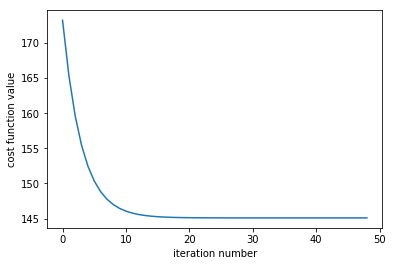

rms error for the training set is: 12.04551030591235
rms error for the test set is: 16.58731450340051


In [13]:
batch_gradient_descent(data['house age'],data['house price of unit area'])

initial value of parameters: [[-1. ]
 [-0.5]]
weight vectors: [[ 44.76608704]
 [-46.50063397]]


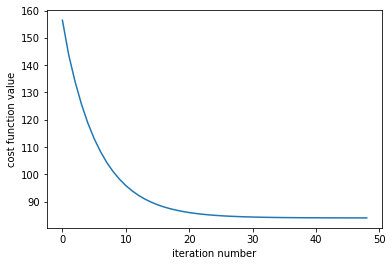

rms error for the training set is: 9.165754538401488
rms error for the test set is: 12.652088009723935


In [14]:
batch_gradient_descent(data['distance to the nearest MRT station'],data['house price of unit area'])

initial value of parameters: [[-1. ]
 [-0.5]]
weight vectors: [[27.48667613]
 [25.64211765]]


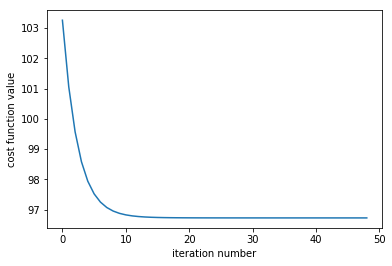

rms error for the training set is: 9.83487827563954
rms error for the test set is: 14.731993508206783


In [15]:
batch_gradient_descent(data['number of convenience stores'],data['house price of unit area'])

Comparing three models, house price prediction based on distance to the station gives the best prediction on test set.